In [23]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools, Descriptors3D, rdMolDescriptors
import openbabel as ob
import pybel
from rdkit.Chem.Draw import IPythonConsole
import sys, py3Dmol

In [2]:
# csv読み込み
df = pd.read_csv("2012_pKaInWater.csv")

In [3]:
# Kaのカラムを追加
df["Ka"] = np.power(10, -df["pKa"])
df

,Smiles,pKa,temp,method,type,group,basicOrAcidic,InChI,InChI-Key,Ka
0,Fc(cc1)ccc1S,6.35,32,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5FS/c7-5-1-3-6(8)4-2-5/h1-4,8H",OKIHXNKYYGUVTE-UHFFFAOYSA-N,4.466836e-07
1,Sc1cccc(Cl)c1,5.76,25,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5ClS/c7-5-2-1-3-6(8)4-5/h1-4,8H",CQJDYPZUDYXHLM-UHFFFAOYSA-N,1.737801e-06
2,Sc(cc1)ccc1Cl,5.82,25,mean from 2,a1/apparent,NaN,acidic,"InChI=1S/C6H5ClS/c7-5-1-3-6(8)4-2-5/h1-4,8H",VZXOZSQDJJNBRC-UHFFFAOYSA-N,1.513561e-06
3,Sc(cc1)ccc1Br,5.80,40,NaN,a1/apparent,SH,acidic,"InChI=1S/C6H5BrS/c7-5-1-3-6(8)4-2-5/h1-4,8H",FTBCOQFMQSTCQQ-UHFFFAOYSA-N,1.584893e-06
4,SCc1ccccc1,9.43,25,spectrophotometric,a1/apparent,S-H,acidic,"InChI=1S/C7H8S/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2",UENWRTRMUIOCKN-UHFFFAOYSA-N,3.715352e-10
...,...,...,...,...,...,...,...,...,...,...
7908,Nc1nccnc1,3.14,20,potentiometric,a/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-3-6-1-2-7-4/h1-3H,(H2,5,7)",XFTQRUTUGRCSGO-UHFFFAOYSA-N,7.244360e-04
7909,Nc1ncncc1,18.40,24.9,spectrophotometric,a1/apparent,NH,acidic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,3.981072e-19
7910,Nc1ncncc1,5.70,20,mean from 2,a1/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,1.995262e-06
7911,Nc1[nH+]c(O)c[nH]1,4.80,25,potentiometric,a1/apparent,NaN,acidic,"InChI=1S/C3H5N3O/c4-3-5-1-2(7)6-3/h1,7H,(H3,4,...",AEGRGDYHZFLAGY-UHFFFAOYSA-O,1.584893e-05


In [4]:
# RDkitのMolオブジェクトのカラムを追加
PandasTools.AddMoleculeColumnToFrame(df, "Smiles")

,Smiles,pKa,temp,method,type,group,basicOrAcidic,InChI,InChI-Key,Ka,ROMol
0,Fc(cc1)ccc1S,6.35,32,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5FS/c7-5-1-3-6(8)4-2-5/h1-4,8H",OKIHXNKYYGUVTE-UHFFFAOYSA-N,4.466836e-07,
1,Sc1cccc(Cl)c1,5.76,25,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5ClS/c7-5-2-1-3-6(8)4-5/h1-4,8H",CQJDYPZUDYXHLM-UHFFFAOYSA-N,1.737801e-06,
2,Sc(cc1)ccc1Cl,5.82,25,mean from 2,a1/apparent,NaN,acidic,"InChI=1S/C6H5ClS/c7-5-1-3-6(8)4-2-5/h1-4,8H",VZXOZSQDJJNBRC-UHFFFAOYSA-N,1.513561e-06,
3,Sc(cc1)ccc1Br,5.80,40,NaN,a1/apparent,SH,acidic,"InChI=1S/C6H5BrS/c7-5-1-3-6(8)4-2-5/h1-4,8H",FTBCOQFMQSTCQQ-UHFFFAOYSA-N,1.584893e-06,
4,SCc1ccccc1,9.43,25,spectrophotometric,a1/apparent,S-H,acidic,"InChI=1S/C7H8S/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2",UENWRTRMUIOCKN-UHFFFAOYSA-N,3.715352e-10,
...,...,...,...,...,...,...,...,...,...,...,...
7908,Nc1nccnc1,3.14,20,potentiometric,a/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-3-6-1-2-7-4/h1-3H,(H2,5,7)",XFTQRUTUGRCSGO-UHFFFAOYSA-N,7.244360e-04,
7909,Nc1ncncc1,18.40,24.9,spectrophotometric,a1/apparent,NH,acidic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,3.981072e-19,
7910,Nc1ncncc1,5.70,20,mean from 2,a1/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,1.995262e-06,
7911,Nc1[nH+]c(O)c[nH]1,4.80,25,potentiometric,a1/apparent,NaN,acidic,"InChI=1S/C3H5N3O/c4-3-5-1-2(7)6-3/h1,7H,(H3,4,...",AEGRGDYHZFLAGY-UHFFFAOYSA-O,1.584893e-05,

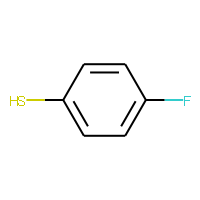
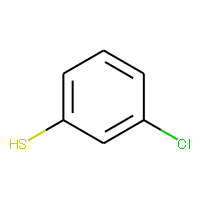
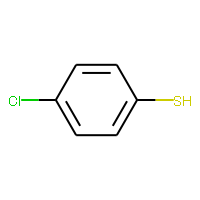
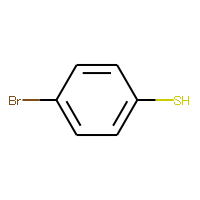
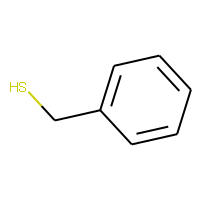
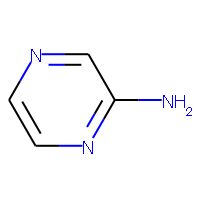
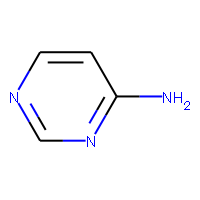
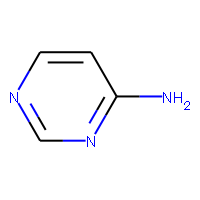
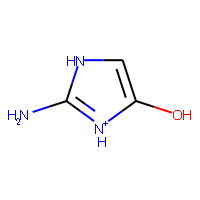
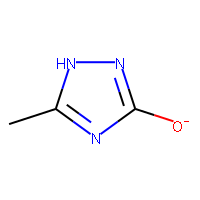

In [5]:
# ROMol(Molオブジェクト)カラムの追加を確認
df

In [6]:
# ROMolカラムの中でNaNを削除
df2 = df.dropna(subset=['ROMol'])

In [7]:
df2.shape

(7911, 11)

In [8]:
# 立体構造の生成

# 立体構造生成でエラーが生じた分子の辞書
errors = {}

# ROMolカラムから立体構造生成
romol_3d_lis = []
for i in range(len(df2)):
    try:
        # 水素追加
        m = Chem.AddHs(df2.iloc[i,10])
        # 立体配座生成
        AllChem.EmbedMolecule(m,useRandomCoords=True)
        # 構造最適化
        AllChem.MMFFOptimizeMolecule(m)
        # romol_3d_lisに立体構造を持つMolオブジェクトを格納
        romol_3d_lis.append(m)
    # エラーが出たらerrors[index] = [SMILES,Molオブジェクト]の形で格納
    except:
        errors[i] = [df2.iloc[i,0], df2.iloc[i,10]]
        # 立体構造を生成出来なかった場合はNoneを格納
        romol_3d_lis.append(None)

# 新たにROmol_3dカラムをdf2に追加
df2['ROmol_3d'] = romol_3d_lis

C:\Users\crema\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Smiles,pKa,temp,method,type,group,basicOrAcidic,InChI,InChI-Key,Ka,ROMol,ROmol_3d
0,Fc(cc1)ccc1S,6.35,32,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5FS/c7-5-1-3-6(8)4-2-5/h1-4,8H",OKIHXNKYYGUVTE-UHFFFAOYSA-N,4.466836e-07,,
1,Sc1cccc(Cl)c1,5.76,25,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5ClS/c7-5-2-1-3-6(8)4-5/h1-4,8H",CQJDYPZUDYXHLM-UHFFFAOYSA-N,1.737801e-06,,
2,Sc(cc1)ccc1Cl,5.82,25,mean from 2,a1/apparent,NaN,acidic,"InChI=1S/C6H5ClS/c7-5-1-3-6(8)4-2-5/h1-4,8H",VZXOZSQDJJNBRC-UHFFFAOYSA-N,1.513561e-06,,
3,Sc(cc1)ccc1Br,5.80,40,NaN,a1/apparent,SH,acidic,"InChI=1S/C6H5BrS/c7-5-1-3-6(8)4-2-5/h1-4,8H",FTBCOQFMQSTCQQ-UHFFFAOYSA-N,1.584893e-06,,
4,SCc1ccccc1,9.43,25,spectrophotometric,a1/apparent,S-H,acidic,"InChI=1S/C7H8S/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2",UENWRTRMUIOCKN-UHFFFAOYSA-N,3.715352e-10,,
...,...,...,...,...,...,...,...,...,...,...,...,...
7908,Nc1nccnc1,3.14,20,potentiometric,a/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-3-6-1-2-7-4/h1-3H,(H2,5,7)",XFTQRUTUGRCSGO-UHFFFAOYSA-N,7.244360e-04,,
7909,Nc1ncncc1,18.40,24.9,spectrophotometric,a1/apparent,NH,acidic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,3.981072e-19,,
7910,Nc1ncncc1,5.70,20,mean from 2,a1/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,1.995262e-06,,
7911,Nc1[nH+]c(O)c[nH]1,4.80,25,potentiometric,a1/apparent,NaN,acidic,"InChI=1S/C3H5N3O/c4-3-5-1-2(7)6-3/h1,7H,(H3,4,...",AEGRGDYHZFLAGY-UHFFFAOYSA-O,1.584893e-05,,

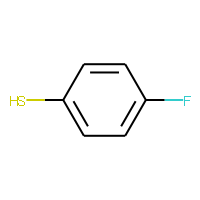
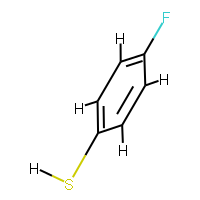
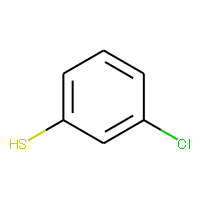
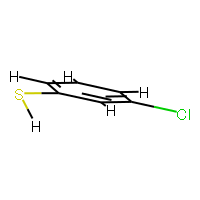
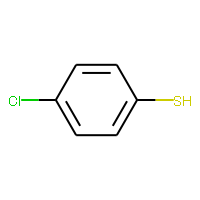
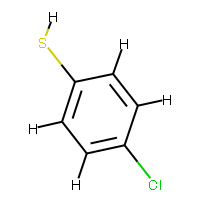
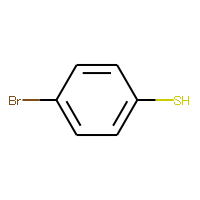
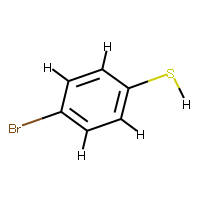
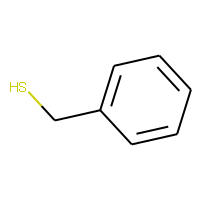
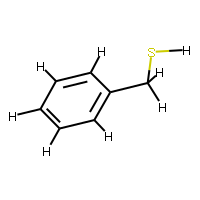
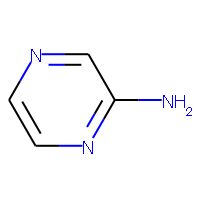
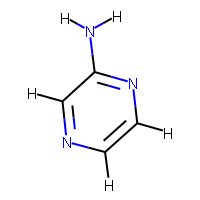
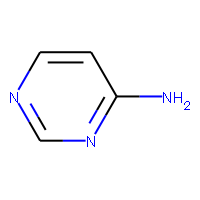
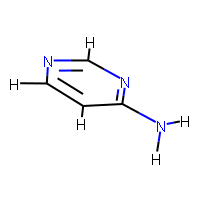
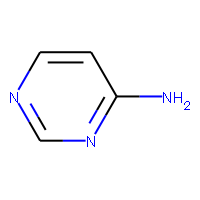
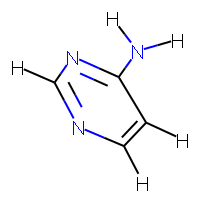
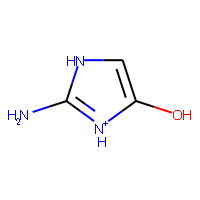
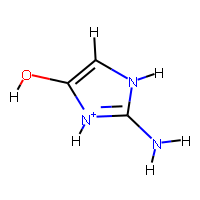
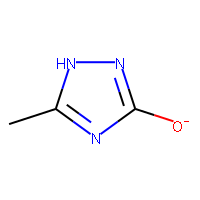
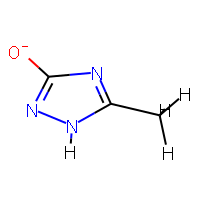

In [9]:
df2

In [10]:
errors

{332: ['C(C1)C2C=CN1CC2', <rdkit.Chem.rdchem.Mol at 0x242e8bee3a0>],
 1170: ['COC(C1=CN2CCC1CC2)=O', <rdkit.Chem.rdchem.Mol at 0x242e8bfef80>],
 1993: ['N#CC1=CN2CCC1CC2', <rdkit.Chem.rdchem.Mol at 0x242e8c0f710>],
 2338: ['CC(C)([C@H](CC1)C2C(O)=O)[C@@]1(C)C2=O',
 2341: ['CC(C)([C@@H](CC1)[C@H]2C(O)=O)[C@]1(C)[C@H]2O',
 2342: ['CC(C)([C@@H](CC1)[C@@H]2C(O)=O)[C@]1(C)[C@H]2O',
 3946: ['CC(C)(CC(CC1)C2)N1C2=O', <rdkit.Chem.rdchem.Mol at 0x242e8c36800>],
 4761: ['C[C@H]([C@@H](CC[C@@]1(C)[C@]2(C3C)OC(c4ccccc4)=N[C@H]1C/C3=N/O)[C@H]2O1)C1=O',
 4762: ['C[C@H]([C@@H](CC[C@@]1(C)[C@]2(C3C)OC(c4ccccc4)=N[C@H]1C/C3=N\\O)[C@H]2O1)C1=O',
 4767: ['C[C@@](CN([C@H]1C2)C3C(C[C@H](C4)C5=C)[C@@]22[C@H]5OC(C)=O)(C[C@H]([C@@H]5OC(C)=O)OC(C)=O)C1[C@@]35[C@@]24O',
 4798: ['COc(c(OC)c1)cc([C@@](CC2)([C@H](C3)N2CC2=CCO[C@H]4C5)[C@@H]6C4[C@]23S([O-])(=O)=O)c1N6C5=O',
 4799: ['COc(c(OC)c1)cc([C@@]2([C@H](C[C@@H]34)N5CC2)[C@@H]2[C@@H]4[C@H](C4)OCC=C3C5S([O-])(=O)=O)c1N2C4=O',
 4816: ['[O-]S([C@]1(C[C@@H]([C@]2

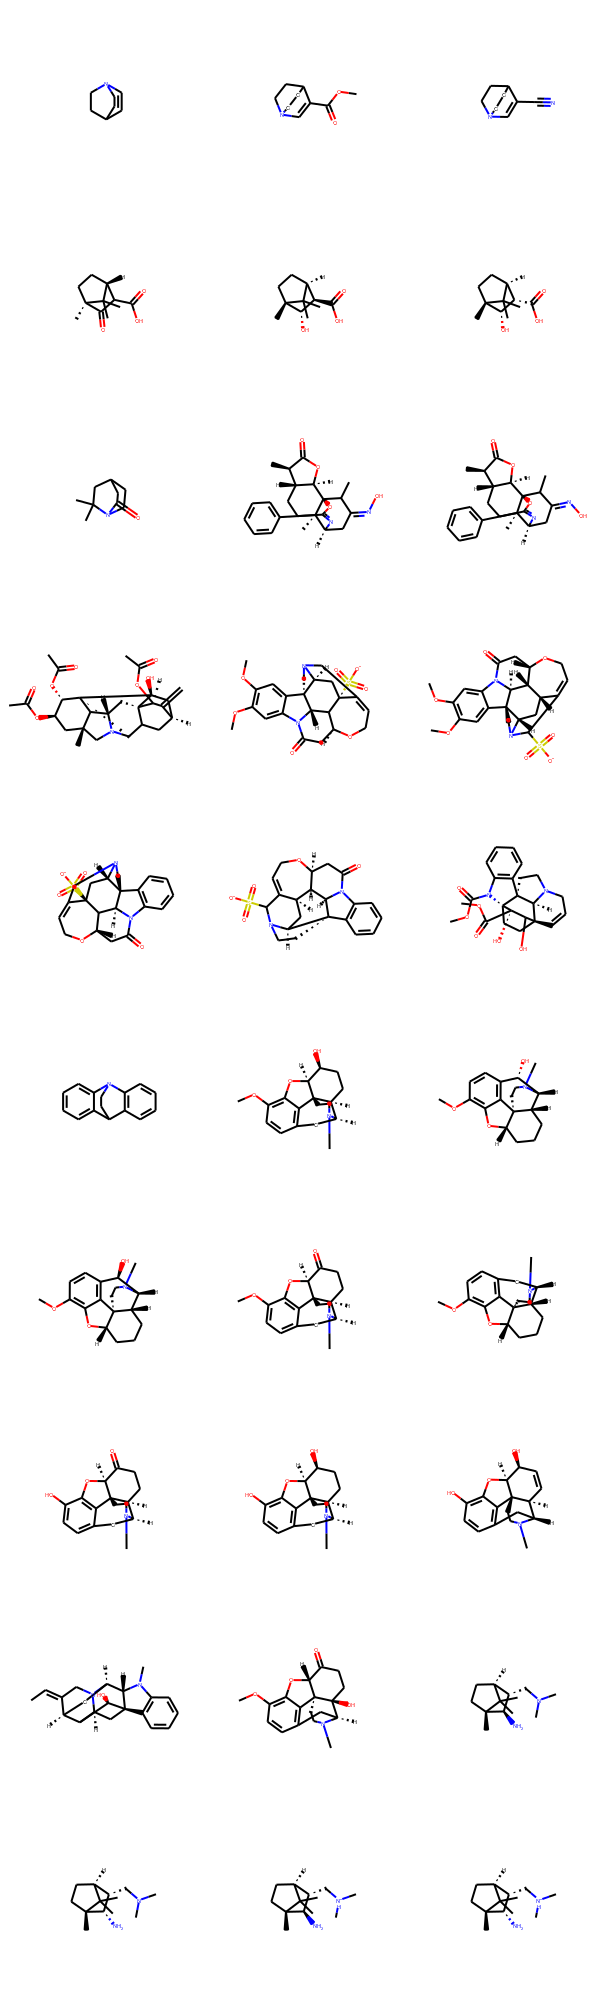

In [12]:
Chem.Draw.MolsToGridImage([i[1] for i in errors.values()])

In [16]:
df3 = df2.dropna(subset=['ROmol_3d'])

In [17]:
print(f"dfのshape{df.shape}")
print(f"df2のshape{df2.shape}")
print(f"df3のshape{df3.shape}")

dfのshape(7913, 11)
df2のshape(7911, 12)
df3のshape(7881, 12)


In [19]:
# basicOrAcidicカラムのユニークを確かめる
df3["basicOrAcidic"].unique()

array(['acidic', 'basic'], dtype=object)

,Smiles,pKa,temp,method,type,group,basicOrAcidic,InChI,InChI-Key,Ka,ROMol,ROmol_3d
0,Fc(cc1)ccc1S,6.35,32,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5FS/c7-5-1-3-6(8)4-2-5/h1-4,8H",OKIHXNKYYGUVTE-UHFFFAOYSA-N,4.466836e-07,,
1,Sc1cccc(Cl)c1,5.76,25,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5ClS/c7-5-2-1-3-6(8)4-5/h1-4,8H",CQJDYPZUDYXHLM-UHFFFAOYSA-N,1.737801e-06,,
2,Sc(cc1)ccc1Cl,5.82,25,mean from 2,a1/apparent,NaN,acidic,"InChI=1S/C6H5ClS/c7-5-1-3-6(8)4-2-5/h1-4,8H",VZXOZSQDJJNBRC-UHFFFAOYSA-N,1.513561e-06,,
3,Sc(cc1)ccc1Br,5.80,40,NaN,a1/apparent,SH,acidic,"InChI=1S/C6H5BrS/c7-5-1-3-6(8)4-2-5/h1-4,8H",FTBCOQFMQSTCQQ-UHFFFAOYSA-N,1.584893e-06,,
4,SCc1ccccc1,9.43,25,spectrophotometric,a1/apparent,S-H,acidic,"InChI=1S/C7H8S/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2",UENWRTRMUIOCKN-UHFFFAOYSA-N,3.715352e-10,,
...,...,...,...,...,...,...,...,...,...,...,...,...
7896,CNc1nnn[nH]1,6.06,25,potentiometric,a/apparent,NaN,acidic,"InChI=1S/C2H5N5/c1-3-2-4-6-7-5-2/h1H3,(H2,3,4,...",LQICKCWPFRQEFI-UHFFFAOYSA-N,8.709636e-07,,
7897,[NH3+]Cc1nnn[nH]1,2.62,25,potentiometric,a1/apparent,NaN,acidic,"InChI=1S/C2H5N5/c3-1-2-4-6-7-5-2/h1,3H2,(H,4,5...",ZHCLIFKUVIFYBY-UHFFFAOYSA-O,2.398833e-03,,
7906,Nc1ncccn1,20.50,24.9,spectrophotometric,a1/apparent,NH,acidic,"InChI=1S/C4H5N3/c5-4-6-2-1-3-7-4/h1-3H,(H2,5,6,7)",LJXQPZWIHJMPQQ-UHFFFAOYSA-N,3.162278e-21,,
7909,Nc1ncncc1,18.40,24.9,spectrophotometric,a1/apparent,NH,acidic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,3.981072e-19,,

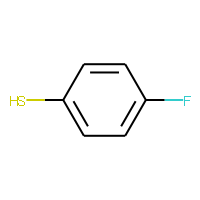
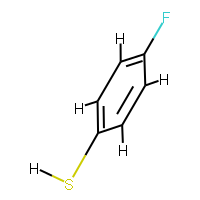
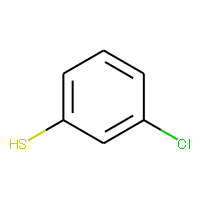
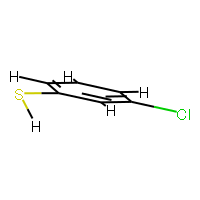
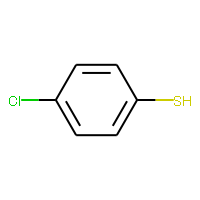
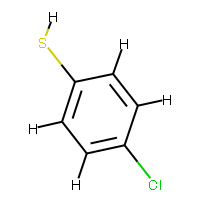
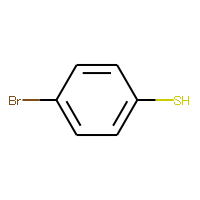
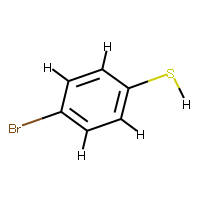
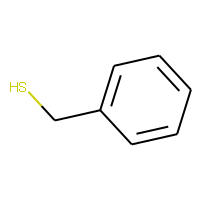
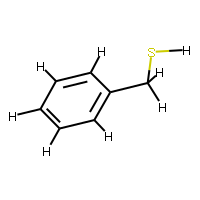
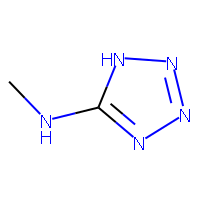
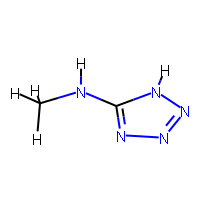
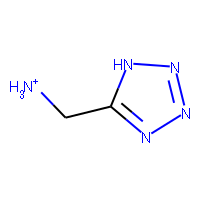
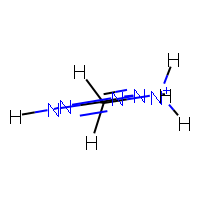
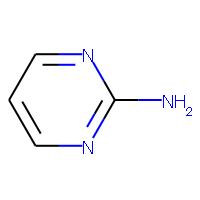
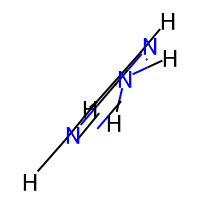
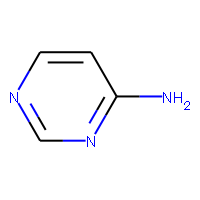
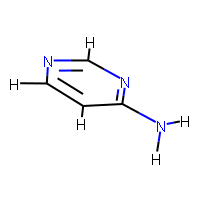
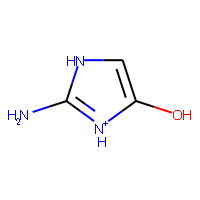
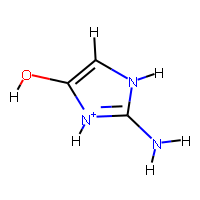

In [20]:
df3_acidic = df3.query('basicOrAcidic == "acidic"')
df3_acidic

,Smiles,pKa,temp,method,type,group,basicOrAcidic,InChI,InChI-Key,Ka,ROMol,ROmol_3d
27,O=C1C=CC=CC=C1,-0.82,25,NaN,a1/apparent,NaN,basic,InChI=1S/C7H6O/c8-7-5-3-1-2-4-6-7/h1-6H,QVWDCTQRORVHHT-UHFFFAOYSA-N,6.606934e+00,,
28,OC1C=CC=CC=C1,-7.00,25,NaN,a1/apparent,COH2(1+),basic,InChI=1S/C7H8O/c8-7-5-3-1-2-4-6-7/h1-8H,VYFFZXBJEZVYLO-UHFFFAOYSA-N,1.000000e+07,,
48,OC(c1ccco1)=O,-0.53,28,NaN,a1/apparent,COO-H,basic,"InChI=1S/C5H4O3/c6-5(7)4-2-1-3-8-4/h1-3H,(H,6,7)",SMNDYUVBFMFKNZ-UHFFFAOYSA-N,3.388442e+00,,
50,OC(c1cocc1)=O,-0.59,25,potentiometric,a1/apparent,COOH,basic,"InChI=1S/C5H4O3/c6-5(7)4-1-2-8-3-4/h1-3H,(H,6,7)",IHCCAYCGZOLTEU-UHFFFAOYSA-N,3.890451e+00,,
61,Nc1ccnc(N)n1,7.26,20,potentiometric,a1/apparent,NaN,basic,"InChI=1S/C4H6N4/c5-3-1-2-7-4(6)8-3/h1-2H,(H4,5...",YAAWASYJIRZXSZ-UHFFFAOYSA-N,5.495409e-08,,
...,...,...,...,...,...,...,...,...,...,...,...,...
7905,Nc1ncccn1,3.55,20,mean from 2,a1/apparent,NH(1+),basic,"InChI=1S/C4H5N3/c5-4-6-2-1-3-7-4/h1-3H,(H2,5,6,7)",LJXQPZWIHJMPQQ-UHFFFAOYSA-N,2.818383e-04,,
7907,Nc1cncnc1,2.83,20,potentiometric,a/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-1-6-3-7-2-4/h1-3H,5H2",FVLAYJRLBLHIPV-UHFFFAOYSA-N,1.479108e-03,,
7908,Nc1nccnc1,3.14,20,potentiometric,a/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-3-6-1-2-7-4/h1-3H,(H2,5,7)",XFTQRUTUGRCSGO-UHFFFAOYSA-N,7.244360e-04,,
7910,Nc1ncncc1,5.70,20,mean from 2,a1/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,1.995262e-06,,

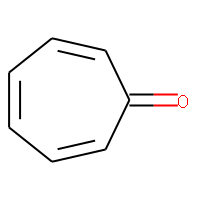
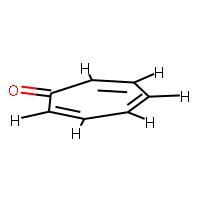
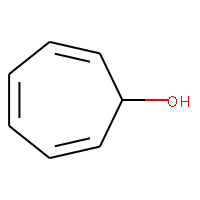
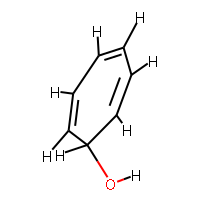
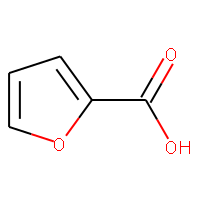
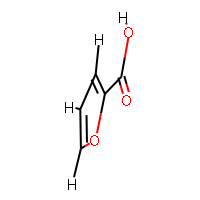
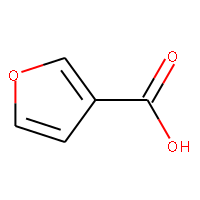
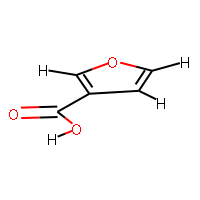
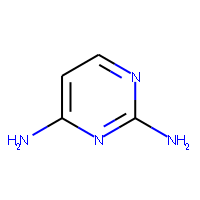
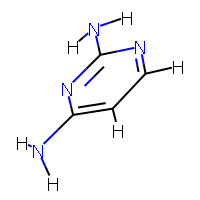
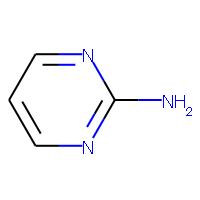
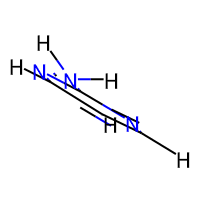
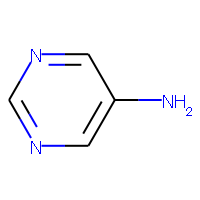
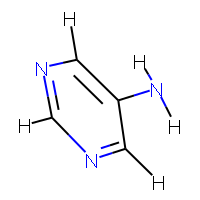
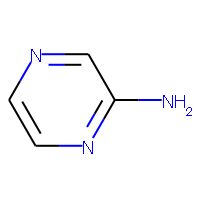
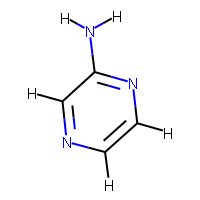
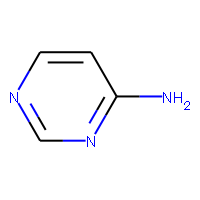
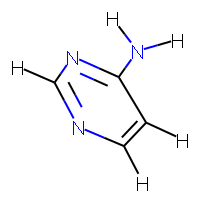
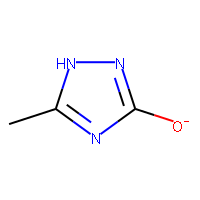
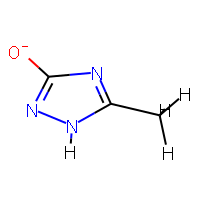

In [21]:
df3_basic = df3.query('basicOrAcidic == "basic"')
df3_basic

In [85]:
descriptors3D_list = [["Asphericity", Descriptors3D.Asphericity],
                      ["InertialShapeFactor", Descriptors3D.InertialShapeFactor],
                      ["NPR1", Descriptors3D.NPR1],
                      ["NPR2", Descriptors3D.NPR2],
                      ["PMI1", Descriptors3D.PMI1],
                      ["PMI2", Descriptors3D.PMI2],
                      ["PMI3", Descriptors3D.PMI3],
                      ["RadiusOfGyration", Descriptors3D.RadiusOfGyration],
                      ["SpherocityIndex", Descriptors3D.SpherocityIndex]]

descriptors2D_list = Descriptors.descList

In [86]:
for n in descriptors3D_list:
    x = [n[1](df3.iloc[i, 11]) for i in range(len(df3))]
    df3[n[0]] = x

for n in descriptors2D_list:
    x = [n[1](df3.iloc[i, 11]) for i in range(len(df3))]
    df3[n[0]] = x

C:\Users\crema\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\crema\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [87]:
df3

,Smiles,pKa,temp,method,type,group,basicOrAcidic,InChI,InChI-Key,Ka,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Fc(cc1)ccc1S,6.35,32,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5FS/c7-5-1-3-6(8)4-2-5/h1-4,8H",OKIHXNKYYGUVTE-UHFFFAOYSA-N,4.466836e-07,...,0,0,0,0,0,0,0,0,0,0
1,Sc1cccc(Cl)c1,5.76,25,mean from 2,a1/apparent,SH,acidic,"InChI=1S/C6H5ClS/c7-5-2-1-3-6(8)4-5/h1-4,8H",CQJDYPZUDYXHLM-UHFFFAOYSA-N,1.737801e-06,...,0,0,0,0,0,0,0,0,0,0
2,Sc(cc1)ccc1Cl,5.82,25,mean from 2,a1/apparent,NaN,acidic,"InChI=1S/C6H5ClS/c7-5-1-3-6(8)4-2-5/h1-4,8H",VZXOZSQDJJNBRC-UHFFFAOYSA-N,1.513561e-06,...,0,0,0,0,0,0,0,0,0,0
3,Sc(cc1)ccc1Br,5.80,40,NaN,a1/apparent,SH,acidic,"InChI=1S/C6H5BrS/c7-5-1-3-6(8)4-2-5/h1-4,8H",FTBCOQFMQSTCQQ-UHFFFAOYSA-N,1.584893e-06,...,0,0,0,0,0,0,0,0,0,0
4,SCc1ccccc1,9.43,25,spectrophotometric,a1/apparent,S-H,acidic,"InChI=1S/C7H8S/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2",UENWRTRMUIOCKN-UHFFFAOYSA-N,3.715352e-10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,Nc1nccnc1,3.14,20,potentiometric,a/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-3-6-1-2-7-4/h1-3H,(H2,5,7)",XFTQRUTUGRCSGO-UHFFFAOYSA-N,7.244360e-04,...,0,0,0,0,0,0,0,0,0,0
7909,Nc1ncncc1,18.40,24.9,spectrophotometric,a1/apparent,NH,acidic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,3.981072e-19,...,0,0,0,0,0,0,0,0,0,0
7910,Nc1ncncc1,5.70,20,mean from 2,a1/apparent,NaN,basic,"InChI=1S/C4H5N3/c5-4-1-2-6-3-7-4/h1-3H,(H2,5,6,7)",OYRRZWATULMEPF-UHFFFAOYSA-N,1.995262e-06,...,0,0,0,0,0,0,0,0,0,0
7911,Nc1[nH+]c(O)c[nH]1,4.80,25,potentiometric,a1/apparent,NaN,acidic,"InChI=1S/C3H5N3O/c4-3-5-1-2(7)6-3/h1,7H,(H3,4,...",AEGRGDYHZFLAGY-UHFFFAOYSA-O,1.584893e-05,...,0,0,0,0,0,0,0,0,0,0
